#***Visualizing Fitness Insights: A Comprehensive Data Analysis***

---



---

###When visiting a gym, the variety of exercises can be overwhelming, from bodyweight workouts to machines and free weights. This project looks at a dataset of strength-based exercises designed to target specific muscle groups like the abdomen, chest, biceps, glutes, and lower back. The dataset includes information on exercise types, fitness levels (beginner, intermediate, expert), and ratings for effectiveness and difficulty. As interest in fitness has grown significantly since the pandemic, understanding the characteristics of different exercises can be beneficial. This analysis provides insights into various workouts, offering guidance on how to explore and select exercises. By exploring the data and creating easy-to-understand visualizations, this project seeks to make it simpler for everyone to find exercises that support their fitness aspirations.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/GYMcleaned_dataset (2) (1).csv")

In [ ]:
df

,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,Barbell roll-out,The barbell roll-out is an abdominal exercise ...,Strength,Abdominals,Barbell,Intermediate,8.9,Average
1,Barbell Ab Rollout - On Knees,The barbell roll-out is an abdominal exercise ...,Strength,Abdominals,Barbell,Intermediate,8.9,Average
2,Decline bar press sit-up,The decline bar press sit-up is a weighted cor...,Strength,Abdominals,Barbell,Intermediate,8.5,Average
3,Bench barbell roll-out,The bench barbell roll-out is a challenging ex...,Strength,Abdominals,Barbell,Beginner,8.3,Average
4,Seated bar twist,The seated bar twist is a core exercise meant ...,Strength,Abdominals,Barbell,Intermediate,4.7,Average
...,...,...,...,...,...,...,...,...
496,Bodyweight triceps press,The bodyweight triceps press is an arm movemen...,Strength,Triceps,Body Only,Intermediate,8.2,Average
497,Straight-arm plank with kick-back,The straight-arm plank with kick-back is a hyb...,Strength,Triceps,Body Only,Intermediate,0.0,Average
498,Decline EZ-bar skullcrusher,The decline EZ-bar skullcrusher is a popular e...,Strength,Triceps,E-Z Curl Bar,Intermediate,9.3,Average
499,EZ-Bar Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,9.0,Average


In [ ]:
df.dtypes

,0
Title,object
Desc,object
Type,object
BodyPart,object
Equipment,object
Level,object
Rating,float64
RatingDesc,object


In [ ]:
df.head()

,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,Barbell roll-out,The barbell roll-out is an abdominal exercise ...,Strength,Abdominals,Barbell,Intermediate,8.9,Average
1,Barbell Ab Rollout - On Knees,The barbell roll-out is an abdominal exercise ...,Strength,Abdominals,Barbell,Intermediate,8.9,Average
2,Decline bar press sit-up,The decline bar press sit-up is a weighted cor...,Strength,Abdominals,Barbell,Intermediate,8.5,Average
3,Bench barbell roll-out,The bench barbell roll-out is a challenging ex...,Strength,Abdominals,Barbell,Beginner,8.3,Average
4,Seated bar twist,The seated bar twist is a core exercise meant ...,Strength,Abdominals,Barbell,Intermediate,4.7,Average


In [ ]:
count_exercises = df.groupby(['BodyPart']).count()
count_exercises

,Title,Desc,Type,Equipment,Level,Rating,RatingDesc
BodyPart,,,,,,,
Abdominals,69,69,69,69,69,69,69
Abductors,4,4,4,4,4,4,4
Adductors,3,3,3,3,3,3,3
Biceps,37,37,37,37,37,37,37
Calves,9,9,9,9,9,9,9
Chest,63,63,63,63,63,63,63
Forearms,9,9,9,9,9,9,9
Glutes,11,11,11,11,11,11,11
Hamstrings,28,28,28,28,28,28,28


# Categorization of Exercises

In [ ]:
#Counting the number exercise by equipment type

equipment_count = df['Equipment'].value_counts()
equipment_count

,count
Equipment,
Body Only,111
Dumbbell,94
Barbell,89
Cable,59
Machine,51
Other,41
Kettlebells,21
E-Z Curl Bar,9
Exercise Ball,8


In [ ]:
#Counting the number of excerise targeting each muscle group

muscle_group_count = df['BodyPart'].value_counts()
muscle_group_count


,count
BodyPart,
Quadriceps,88
Shoulders,79
Abdominals,69
Chest,63
Biceps,37
Triceps,34
Hamstrings,28
Lats,28
Middle Back,22


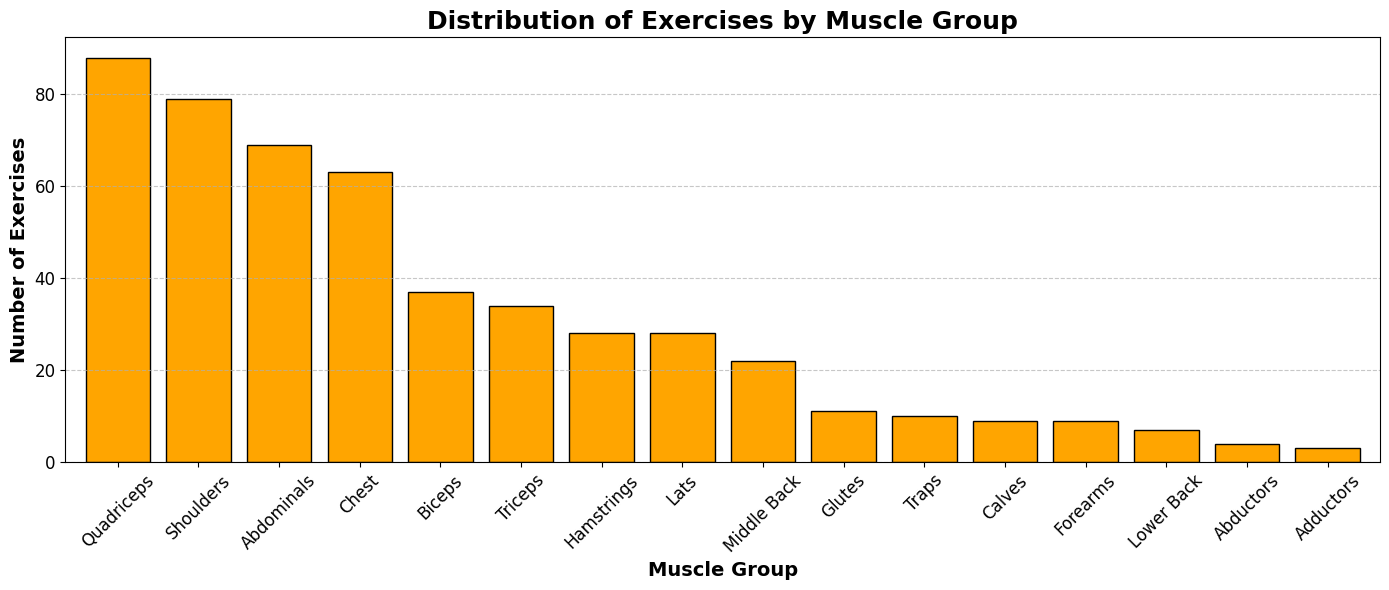

In [ ]:
plt.figure(figsize=(14, 6))

muscle_group_count.plot(kind='bar', color='orange', edgecolor='black', width=0.8)

plt.title('Distribution of Exercises by Muscle Group', fontsize=18, fontweight='bold', color='black')
plt.xlabel('Muscle Group', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Number of Exercises', fontsize=14, fontweight='bold', color='black')
plt.xticks(rotation=45, fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()





<Figure size 1600x800 with 0 Axes>

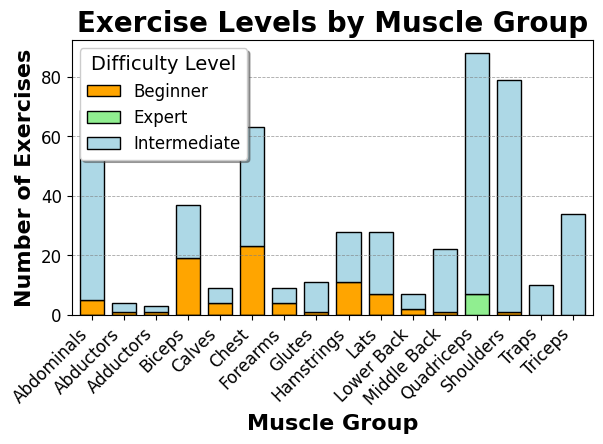

In [ ]:
# Grouping by 'BodyPart' and 'Level' to count exercises per level in each muscle group
level_muscle_counts = df.groupby(['BodyPart', 'Level']).size().unstack().fillna(0)

colors = ['orange', 'lightgreen', 'lightblue']

plt.figure(figsize=(16, 8))
level_muscle_counts.plot(kind='bar', stacked=True, color=colors, edgecolor='black', width=0.75)

plt.title('Exercise Levels by Muscle Group', fontsize=20, fontweight='bold', color='black')
plt.xlabel('Muscle Group', fontsize=16, fontweight='bold', color='black')
plt.ylabel('Number of Exercises', fontsize=16, fontweight='bold', color='black')

plt.xticks(rotation=45, ha='right', fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')


plt.legend(title="Difficulty Level", title_fontsize=14, fontsize=12, loc='upper left', frameon=True, shadow=True, fancybox=True)


plt.grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.7, color='gray')

plt.tight_layout(pad=2)
plt.show()




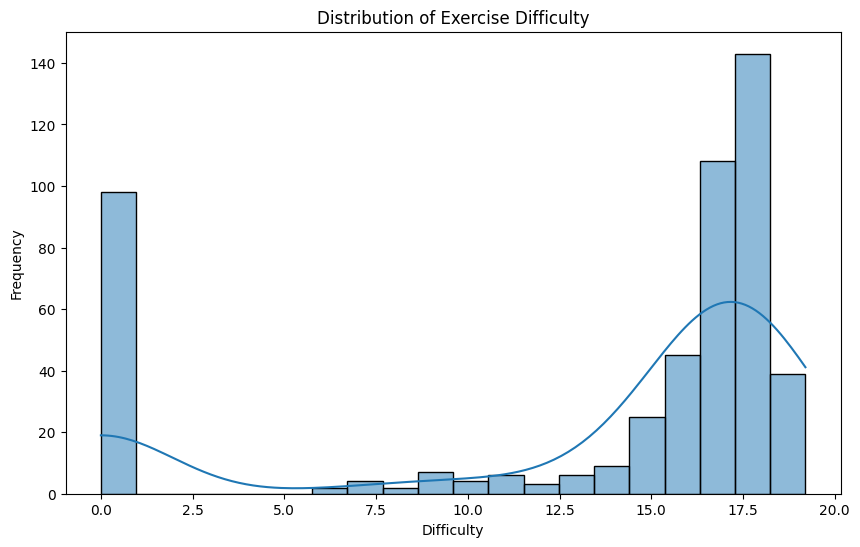

In [ ]:
# Histogram of difficulty level

plt.figure(figsize=(10, 6))
sns.histplot(df['difficulty'], bins=20, kde=True)
plt.title("Distribution of Exercise Difficulty")
plt.xlabel("Difficulty")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Pie chart of exercise types ( Excercise count by body part)
type_counts = df['Type'].value_counts()

fig = px.pie(type_counts, values=type_counts.values, names=type_counts.index, title="Exercise Types Distribution")
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')), pull=[0.1, 0.1, 0.1])
fig.show()


In [ ]:
# Counting exercises by Level and Equipment
level_equipment_counts = df.groupby(['Level', 'Equipment']).size().reset_index(name='Count')

# Stacked bar chart for beginner and intermediate levels
fig = px.bar(level_equipment_counts, x='Equipment', y='Count', color='Level', title="Exercise Count by Level and Equipment", labels={'Count': 'Number of Exercises'})
fig.show()

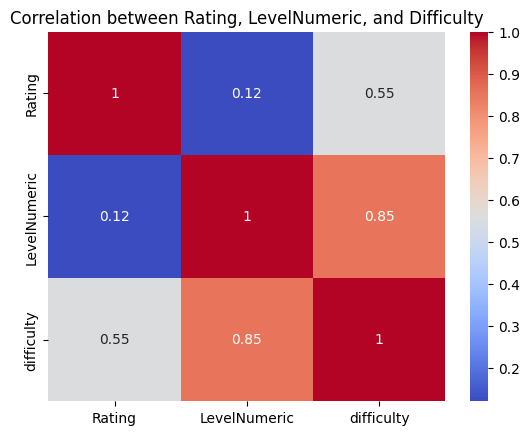

In [ ]:
# Correlation matrix
corr_matrix = df[['Rating', 'LevelNumeric', 'difficulty']].corr()

# Heatmap of correlations
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation between Rating, LevelNumeric, and Difficulty")
plt.show()

In [ ]:
df['LevelNumeric'] = df['Level'].astype('category').cat.codes
df['BodyPart_Number'] = df['BodyPart'].astype('category').cat.codes
df['Type_Number'] = df['Type'].astype('category').cat.codes
df['Equipment_Number'] = df['Equipment'].astype('category').cat.codes

df

,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc,LevelNumeric,BodyPart_Number,Type_Number,Equipment_Number
0,Barbell roll-out,The barbell roll-out is an abdominal exercise ...,Strength,Abdominals,Barbell,Intermediate,8.9,Average,2,0,4,1
1,Barbell Ab Rollout - On Knees,The barbell roll-out is an abdominal exercise ...,Strength,Abdominals,Barbell,Intermediate,8.9,Average,2,0,4,1
2,Decline bar press sit-up,The decline bar press sit-up is a weighted cor...,Strength,Abdominals,Barbell,Intermediate,8.5,Average,2,0,4,1
3,Bench barbell roll-out,The bench barbell roll-out is a challenging ex...,Strength,Abdominals,Barbell,Beginner,8.3,Average,0,0,4,1
4,Seated bar twist,The seated bar twist is a core exercise meant ...,Strength,Abdominals,Barbell,Intermediate,4.7,Average,2,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
496,Bodyweight triceps press,The bodyweight triceps press is an arm movemen...,Strength,Triceps,Body Only,Intermediate,8.2,Average,2,15,4,2
497,Straight-arm plank with kick-back,The straight-arm plank with kick-back is a hyb...,Strength,Triceps,Body Only,Intermediate,0.0,Average,2,15,4,2
498,Decline EZ-bar skullcrusher,The decline EZ-bar skullcrusher is a popular e...,Strength,Triceps,E-Z Curl Bar,Intermediate,9.3,Average,2,15,4,5
499,EZ-Bar Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,9.0,Average,2,15,4,5


In [ ]:
df['difficulty'] = df['Rating'] * df['LevelNumeric']
df

,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc,LevelNumeric,BodyPart_Number,Type_Number,Equipment_Number,difficulty
0,Barbell roll-out,The barbell roll-out is an abdominal exercise ...,Strength,Abdominals,Barbell,Intermediate,8.9,Average,2,0,4,1,17.8
1,Barbell Ab Rollout - On Knees,The barbell roll-out is an abdominal exercise ...,Strength,Abdominals,Barbell,Intermediate,8.9,Average,2,0,4,1,17.8
2,Decline bar press sit-up,The decline bar press sit-up is a weighted cor...,Strength,Abdominals,Barbell,Intermediate,8.5,Average,2,0,4,1,17.0
3,Bench barbell roll-out,The bench barbell roll-out is a challenging ex...,Strength,Abdominals,Barbell,Beginner,8.3,Average,0,0,4,1,0.0
4,Seated bar twist,The seated bar twist is a core exercise meant ...,Strength,Abdominals,Barbell,Intermediate,4.7,Average,2,0,4,1,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Bodyweight triceps press,The bodyweight triceps press is an arm movemen...,Strength,Triceps,Body Only,Intermediate,8.2,Average,2,15,4,2,16.4
497,Straight-arm plank with kick-back,The straight-arm plank with kick-back is a hyb...,Strength,Triceps,Body Only,Intermediate,0.0,Average,2,15,4,2,0.0
498,Decline EZ-bar skullcrusher,The decline EZ-bar skullcrusher is a popular e...,Strength,Triceps,E-Z Curl Bar,Intermediate,9.3,Average,2,15,4,5,18.6
499,EZ-Bar Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,9.0,Average,2,15,4,5,18.0


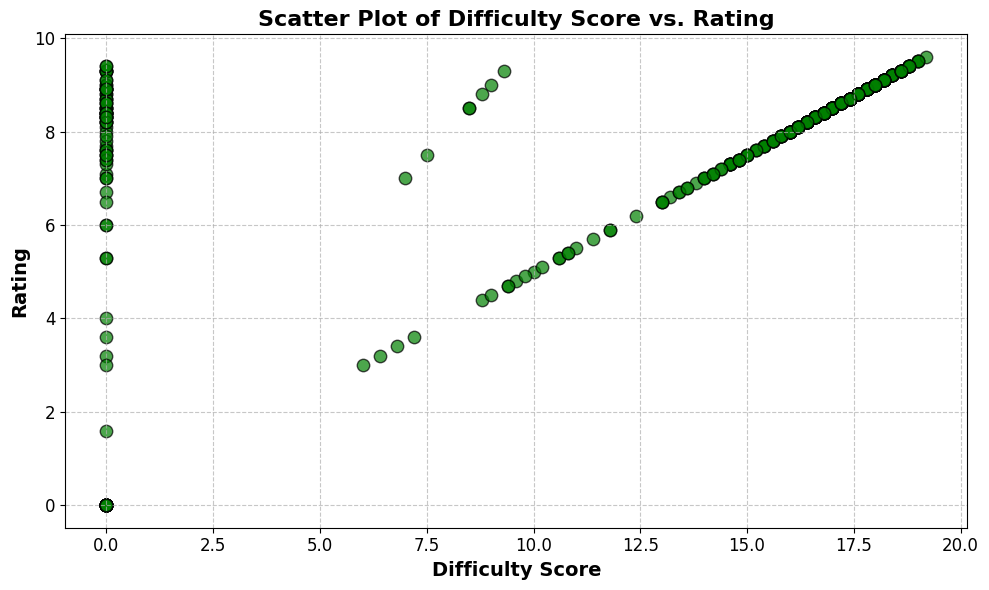

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(df['difficulty'], df['Rating'], color='green', alpha=0.7, edgecolors='black', s=80)
plt.title('Scatter Plot of Difficulty Score vs. Rating', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Difficulty Score', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Rating', fontsize=14, fontweight='bold', color='black')

plt.grid(linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

plt.tight_layout()
plt.show()

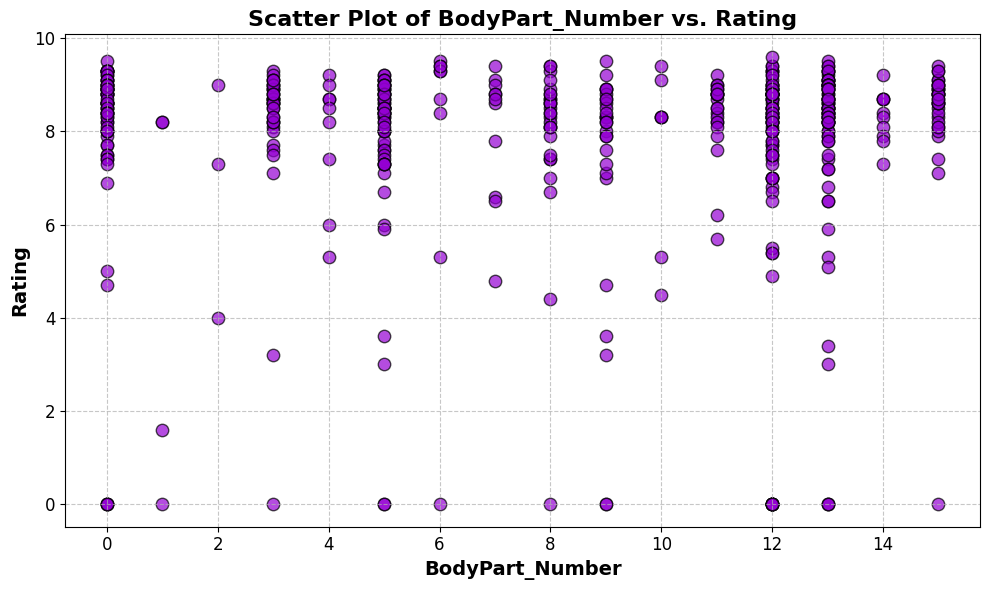

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(df['BodyPart_Number'], df['Rating'], color='darkviolet', alpha=0.7, edgecolors='black', s=80)
plt.title('Scatter Plot of BodyPart_Number vs. Rating', fontsize=16, fontweight='bold', color='black')
plt.xlabel('BodyPart_Number', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Rating', fontsize=14, fontweight='bold', color='black')

plt.grid(linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

plt.tight_layout()
plt.show()


In [ ]:
k=3
cmeans = np.random.rand(k,2)*1.2 + np.array([0,0])
cmeans

array([[1.07868151, 0.12315758],
       [1.11509308, 0.01607285],
       [0.48922923, 0.7874357 ]])

In [ ]:
k = 3
cmeans = np.random.rand(k,2)*np.array([2,3]) + np.array([0,0])
cmeans

array([[0.41346843, 1.60025071],
       [0.49474384, 1.54449277],
       [0.2664568 , 1.56418618]])

In [ ]:
k = 6
cmeans = np.random.rand(k,2) @ np.array([[2,0],[0,10]]) + np.array([0,0])
cmeans

array([[0.17777741, 9.23334502],
       [0.97331934, 0.81886427],
       [1.27688986, 4.70594147],
       [1.26666135, 3.30350201],
       [0.55989644, 1.39292904],
       [0.56033116, 4.92867236]])

<Axes: xlabel='0', ylabel='1'>

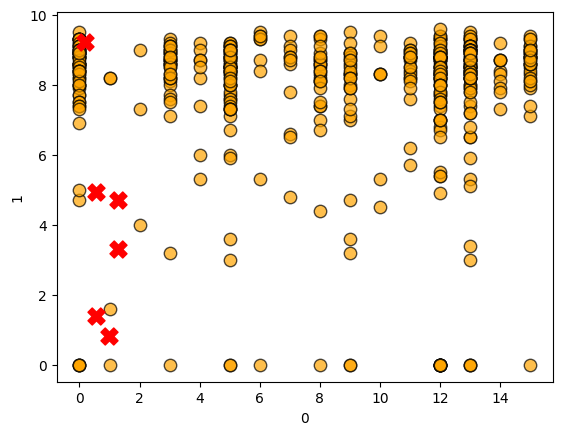

In [ ]:
ax = df.plot.scatter(x='BodyPart_Number', y='Rating', color = 'orange',  alpha=0.7, edgecolors='black', s=80)
pd.DataFrame(cmeans).plot.scatter(x=0, y=1, ax=ax, color='red', s=150, marker='X')



In [ ]:
df['cluster'] = np.zeros((df.shape[0],1))
df

,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc,LevelNumeric,BodyPart_Number,Type_Number,Equipment_Number,difficulty,cluster
0,Barbell roll-out,The barbell roll-out is an abdominal exercise ...,Strength,Abdominals,Barbell,Intermediate,8.9,Average,2,0,4,1,17.8,0.0
1,Barbell Ab Rollout - On Knees,The barbell roll-out is an abdominal exercise ...,Strength,Abdominals,Barbell,Intermediate,8.9,Average,2,0,4,1,17.8,0.0
2,Decline bar press sit-up,The decline bar press sit-up is a weighted cor...,Strength,Abdominals,Barbell,Intermediate,8.5,Average,2,0,4,1,17.0,0.0
3,Bench barbell roll-out,The bench barbell roll-out is a challenging ex...,Strength,Abdominals,Barbell,Beginner,8.3,Average,0,0,4,1,0.0,0.0
4,Seated bar twist,The seated bar twist is a core exercise meant ...,Strength,Abdominals,Barbell,Intermediate,4.7,Average,2,0,4,1,9.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Bodyweight triceps press,The bodyweight triceps press is an arm movemen...,Strength,Triceps,Body Only,Intermediate,8.2,Average,2,15,4,2,16.4,0.0
497,Straight-arm plank with kick-back,The straight-arm plank with kick-back is a hyb...,Strength,Triceps,Body Only,Intermediate,0.0,Average,2,15,4,2,0.0,0.0
498,Decline EZ-bar skullcrusher,The decline EZ-bar skullcrusher is a popular e...,Strength,Triceps,E-Z Curl Bar,Intermediate,9.3,Average,2,15,4,5,18.6,0.0
499,EZ-Bar Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,9.0,Average,2,15,4,5,18.0,0.0


In [ ]:
dist = pd.DataFrame()
for _k in np.arange(k):
  dist[_k] = np.sqrt(((df[['BodyPart_Number', 'Rating']] - cmeans[_k])**2).sum(axis=1))
dist

,0,1,2,3,4,5
0,0.377788,8.139540,4.384128,5.738050,7.527921,4.010663
1,0.377788,8.139540,4.384128,5.738050,7.527921,4.010663
2,0.754586,7.742557,4.003165,5.348647,7.129091,3.615018
3,0.950125,7.544186,3.814145,5.154554,6.929727,3.417575
4,4.536829,4.001320,1.276904,1.885375,3.354132,0.605196
...,...,...,...,...,...,...
496,14.858199,15.850203,14.160939,14.580133,15.964110,14.805594
497,17.462902,14.050563,14.507572,14.125074,14.507131,15.257649
498,14.822372,16.391383,14.471666,14.985412,16.463243,15.086833
499,14.824059,16.238188,14.379245,14.867908,16.321278,15.002658


In [ ]:
df['cluster'] = dist.idxmin(axis=1)
df


,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc,LevelNumeric,BodyPart_Number,Type_Number,Equipment_Number,difficulty,cluster
0,Barbell roll-out,The barbell roll-out is an abdominal exercise ...,Strength,Abdominals,Barbell,Intermediate,8.9,Average,2,0,4,1,17.8,0
1,Barbell Ab Rollout - On Knees,The barbell roll-out is an abdominal exercise ...,Strength,Abdominals,Barbell,Intermediate,8.9,Average,2,0,4,1,17.8,0
2,Decline bar press sit-up,The decline bar press sit-up is a weighted cor...,Strength,Abdominals,Barbell,Intermediate,8.5,Average,2,0,4,1,17.0,0
3,Bench barbell roll-out,The bench barbell roll-out is a challenging ex...,Strength,Abdominals,Barbell,Beginner,8.3,Average,0,0,4,1,0.0,0
4,Seated bar twist,The seated bar twist is a core exercise meant ...,Strength,Abdominals,Barbell,Intermediate,4.7,Average,2,0,4,1,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Bodyweight triceps press,The bodyweight triceps press is an arm movemen...,Strength,Triceps,Body Only,Intermediate,8.2,Average,2,15,4,2,16.4,2
497,Straight-arm plank with kick-back,The straight-arm plank with kick-back is a hyb...,Strength,Triceps,Body Only,Intermediate,0.0,Average,2,15,4,2,0.0,1
498,Decline EZ-bar skullcrusher,The decline EZ-bar skullcrusher is a popular e...,Strength,Triceps,E-Z Curl Bar,Intermediate,9.3,Average,2,15,4,5,18.6,2
499,EZ-Bar Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,9.0,Average,2,15,4,5,18.0,2


In [ ]:
cmeans = df.groupby('cluster')[['BodyPart_Number', 'Rating']].mean()
cmeans

,BodyPart_Number,Rating
cluster,,
0,9.733333,2.180000
1,9.661578,8.375827
2,2.800000,0.000000
3,1.000000,1.600000
4,2.000000,5.150000
5,0.030769,8.553846


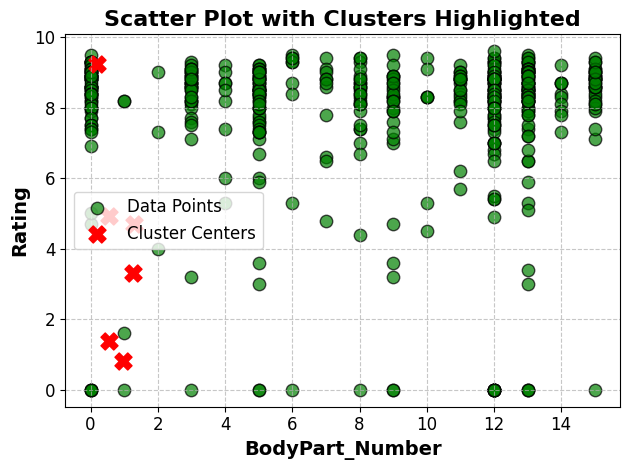

In [ ]:
# scatter plot
ax = df.plot.scatter(x='BodyPart_Number', y='Rating', color='green', alpha=0.7, s=80, edgecolors='black', label='Data Points')

# Plot the cluster centers
pd.DataFrame(cmeans).plot.scatter(x=0, y=1, ax=ax, color='red', s=150, marker='X', label='Cluster Centers')

plt.title('Scatter Plot with Clusters Highlighted', fontsize=16, fontweight='bold', color='black')
plt.xlabel('BodyPart_Number', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Rating', fontsize=14, fontweight='bold', color='black')
plt.legend(loc='best', fontsize=12)

plt.grid(linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

plt.tight_layout()
plt.show()


In [ ]:
dist = pd.DataFrame()
for _k in np.arange(k):

    mean_rating, mean_difficulty = df['Rating'].mean(), df['difficulty'].mean()
    rating_diff = df['Rating'] - mean_rating
    difficulty_diff = df['difficulty'] - mean_difficulty
    centroid_rating, centroid_difficulty = cmeans[_k]

    numerator = (rating_diff * (centroid_rating - mean_rating) +
                 difficulty_diff * (centroid_difficulty - mean_difficulty))
    denominator = np.sqrt((rating_diff ** 2).sum() * (difficulty_diff ** 2).sum())

    dist[_k] = numerator / denominator

dist

,0,1,2,3,4,5
0,-0.003700,-0.008952,-0.006425,-0.007322,-0.008647,-0.006390
1,-0.003700,-0.008952,-0.006425,-0.007322,-0.008647,-0.006390
2,-0.002822,-0.007177,-0.005103,-0.005842,-0.006913,-0.005052
3,0.006927,0.022575,0.015390,0.017989,0.021484,0.014931
4,0.005513,0.009688,0.007465,0.008223,0.009560,0.007660
...,...,...,...,...,...,...
496,-0.002164,-0.005845,-0.004110,-0.004731,-0.005612,-0.004049
497,0.015823,0.030546,0.023009,0.025619,0.029936,0.023382
498,-0.004577,-0.010727,-0.007748,-0.008803,-0.010381,-0.007728
499,-0.003919,-0.009396,-0.006756,-0.007692,-0.009081,-0.006725


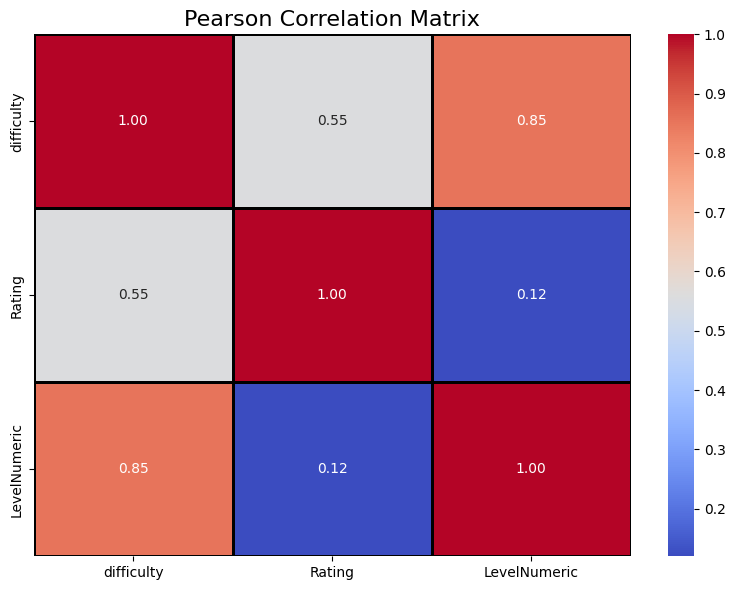

In [ ]:
df['difficulty'] = pd.to_numeric(df['difficulty'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['LevelNumeric'] = pd.to_numeric(df['LevelNumeric'], errors='coerce')

# Select the columns for correlation analysis
df_continuous = df[['difficulty', 'Rating', 'LevelNumeric']].dropna()

# Calculate the Pearson correlation matrix
correlation_matrix = df_continuous.corr(method='pearson')

# Ploting the Pearson correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Pearson Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

# KNN

In [ ]:
df_KNN = df[['Type_Number', 'Rating']].dropna()
df_KNN

,Type_Number,Rating
0,4,8.9
1,4,8.9
2,4,8.5
3,4,8.3
4,4,4.7
...,...,...
496,4,8.2
497,4,0.0
498,4,9.3
499,4,9.0


In [ ]:
df_KNN['high_rating'] = (df_KNN['Rating'] > 7).astype(int)
df_KNN

,Type_Number,Rating,high_rating
0,4,8.9,1
1,4,8.9,1
2,4,8.5,1
3,4,8.3,1
4,4,4.7,0
...,...,...,...
496,4,8.2,1
497,4,0.0,0
498,4,9.3,1
499,4,9.0,1


In [ ]:
# Dividing =  the dataset into training and testing
kdf_train = df_KNN.iloc[:350]  # First 350 rows for training (70% of 501 rows)
kdf_test = df_KNN.iloc[350:]   # Remaining 151 rows for testing (30% of 501 rows)

kdf_test

,Type_Number,Rating,high_rating
350,4,0.0,0
351,4,9.6,1
352,0,9.1,1
353,4,8.8,1
354,0,8.8,1
...,...,...,...
496,4,8.2,1
497,4,0.0,0
498,4,9.3,1
499,4,9.0,1


In [ ]:
# Selecting  a testing point for k-NN (using 'Type_Number' and 'Rating' for the test point)
pt_Test1 = kdf_test.iloc[3][['Type_Number', 'Rating']]
pt_Test1

,353
Type_Number,4.0
Rating,8.8


In [ ]:
# Calculating  the distance to the testing point for each row in the training set
distances = np.sqrt(
    ((kdf_train['Type_Number'] - pt_Test1['Type_Number']) ** 2) +
    ((kdf_train['Rating'] - pt_Test1['Rating']) ** 2)
)
distances

,0
0,0.100000
1,0.100000
2,0.300000
3,0.500000
4,4.100000
...,...
345,2.690725
346,2.828427
347,2.100000
348,2.300000


In [ ]:
k = 5 # Number of nearest neighbors to consider
# Sorting  the distances and get the top 'k' closest neighbors
nearest_neighbors_idx = distances.sort_values().head(k).index
# Using those indices to get the corresponding rows from the training set
nearest_neighbors = kdf_train.loc[nearest_neighbors_idx]
# Display the nearest neighbors
nearest_neighbors

,Type_Number,Rating,high_rating
132,4,8.8,1
43,4,8.8,1
44,4,8.8,1
280,4,8.8,1
283,4,8.8,1


In [ ]:
nearest_neighbors['high_rating'].sum()/k

0.8

# PCA

In [ ]:
df_number = df.select_dtypes(include = 'number')
df_number

,Rating,LevelNumeric,BodyPart_Number,Type_Number,Equipment_Number,difficulty,cluster
0,8.9,2,0,4,1,17.8,0
1,8.9,2,0,4,1,17.8,0
2,8.5,2,0,4,1,17.0,0
3,8.3,0,0,4,1,0.0,0
4,4.7,2,0,4,1,9.4,5
...,...,...,...,...,...,...,...
496,8.2,2,15,4,2,16.4,2
497,0.0,2,15,4,2,0.0,1
498,9.3,2,15,4,5,18.6,2
499,9.0,2,15,4,5,18.0,2


In [ ]:
mean_diff = df_number - df_number.mean()
mean_diff

,Rating,LevelNumeric,BodyPart_Number,Type_Number,Equipment_Number
0,1.065669,0.333333,-8.231537,0.161677,-3.293413
1,1.065669,0.333333,-8.231537,0.161677,-3.293413
2,0.665669,0.333333,-8.231537,0.161677,-3.293413
3,0.465669,-1.666667,-8.231537,0.161677,-3.293413
4,-3.134331,0.333333,-8.231537,0.161677,-3.293413
...,...,...,...,...,...
496,0.365669,0.333333,6.768463,0.161677,-2.293413
497,-7.834331,0.333333,6.768463,0.161677,-2.293413
498,1.465669,0.333333,6.768463,0.161677,0.706587
499,1.165669,0.333333,6.768463,0.161677,0.706587


In [ ]:
#Calculating the Covariance Matrix
cov_matrix = (mean_diff.T @ mean_diff) / (mean_diff.shape[0] - 1)
cov_matrix


,Rating,LevelNumeric,BodyPart_Number,Type_Number,Equipment_Number
Rating,4.340219,0.183467,0.093635,-0.175238,-0.636693
LevelNumeric,0.183467,0.542667,0.913333,-0.040000,-0.028000
BodyPart_Number,0.093635,0.913333,24.078283,-0.588491,-0.228072
Type_Number,-0.175238,-0.040000,-0.588491,0.743808,-0.060467
Equipment_Number,-0.636693,-0.028000,-0.228072,-0.060467,10.547737


In [ ]:
np.cov(df_number.T)-cov_matrix

,Rating,LevelNumeric,BodyPart_Number,Type_Number,Equipment_Number
Rating,0.000000e+00,2.775558e-17,2.775558e-17,0.000000e+00,-1.110223e-16
LevelNumeric,2.775558e-17,2.220446e-16,0.000000e+00,0.000000e+00,-3.469447e-17
BodyPart_Number,2.775558e-17,0.000000e+00,0.000000e+00,0.000000e+00,-1.387779e-16
Type_Number,0.000000e+00,0.000000e+00,0.000000e+00,-1.110223e-16,6.938894e-18
Equipment_Number,-1.110223e-16,-3.816392e-17,1.387779e-16,9.714451e-17,1.776357e-15


In [ ]:
#Finding Eigenvalues
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
display(eigenvalues)
display(eigenvectors)


array([ 0.49849328,  0.7200735 ,  4.29253109, 10.60859359, 24.13302255])

array([[-4.49875697e-02, -5.12423607e-02, -9.92558591e-01,
        -1.00714971e-01, -5.85461921e-03],
       [ 9.97463441e-01,  3.71854552e-02, -4.65972650e-02,
        -2.99245971e-03, -3.87771392e-02],
       [-3.74528060e-02, -2.64794236e-02,  7.17879605e-03,
         1.75128940e-02, -9.98768187e-01],
       [ 4.04923633e-02, -9.97592590e-01,  5.00602575e-02,
        -5.34086745e-03,  2.51959993e-02],
       [-6.77443006e-04, -9.96627466e-03, -1.00491658e-01,
         9.94742335e-01,  1.70096340e-02]])

Explained Variance Ratio of PCA Components:
[0.59953777 0.26354977 0.10663954 0.01788882 0.01238409]


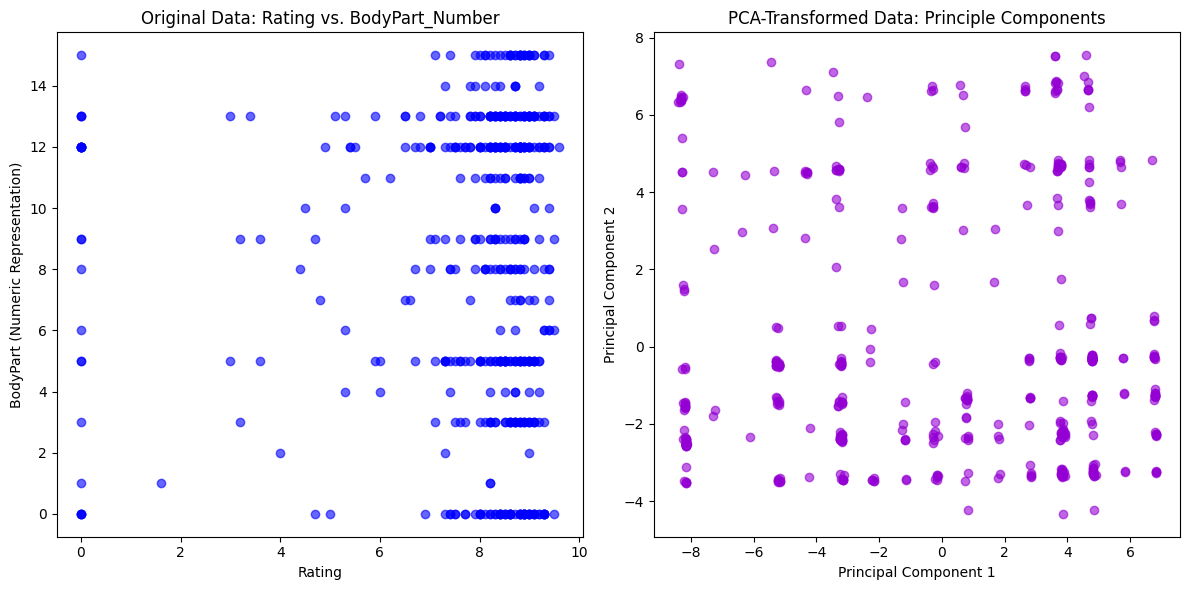

In [ ]:
# Using Sklearn to calculate eigenvalues and eigenvectors
pca = PCA(n_components=len(df_number.columns))
pca.fit(df_number)

# Printing explained variance ratio
print("Explained Variance Ratio of PCA Components:")
print(pca.explained_variance_ratio_)

# Transforming data
df_number_pca = pca.transform(df_number)

plt.figure(figsize=(12, 6))

# PCA Scatterplot of original variables
plt.subplot(1, 2, 1)
plt.scatter(df_number['Rating'], df_number['BodyPart_Number'], alpha=0.6, color='blue')
plt.title('Original Data: Rating vs. BodyPart_Number')
plt.xlabel('Rating')
plt.ylabel('BodyPart (Numeric Representation)')

# PCA Scatterplot of principal components
plt.subplot(1, 2, 2)
plt.scatter(df_number_pca[:, 0], df_number_pca[:, 1], alpha=0.6, color='darkviolet')
plt.title('PCA-Transformed Data: Principle Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


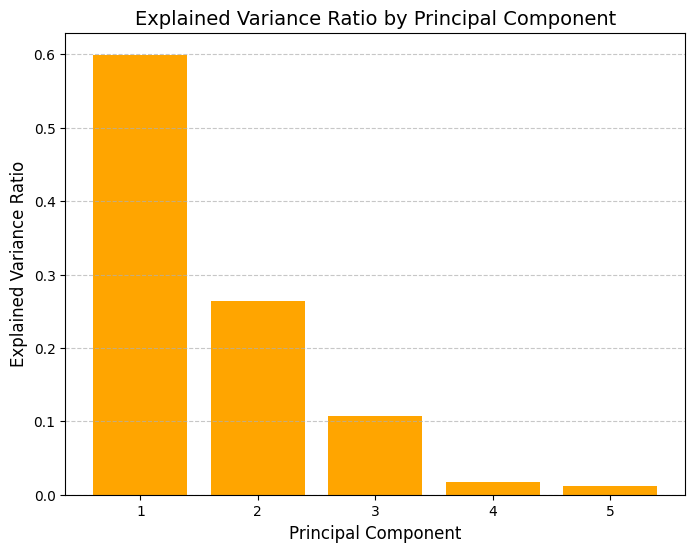

In [ ]:
#Plotting
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='orange')
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.title('Explained Variance Ratio by Principal Component', fontsize=14)
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

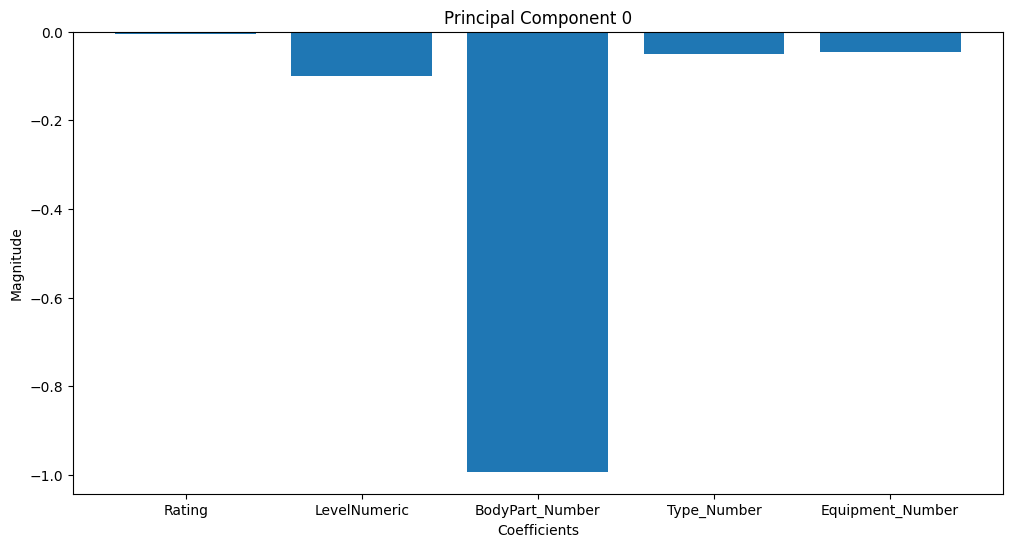

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(df_number.columns,eigenvectors[0])
plt.xlabel('Coefficients')
plt.ylabel('Magnitude')
plt.title('Principal Component 0')
plt.show()


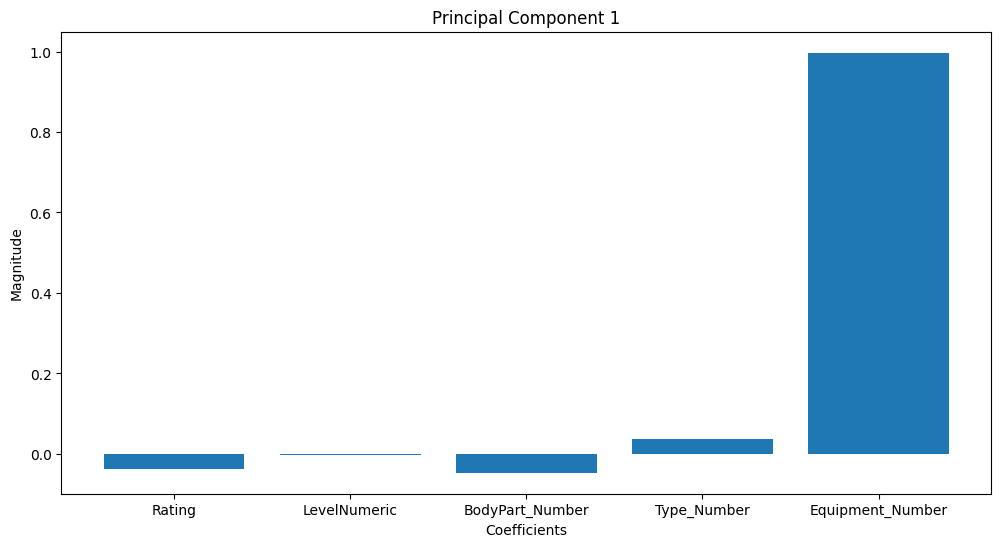

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(df_number.columns,eigenvectors[1])
plt.xlabel('Coefficients')
plt.ylabel('Magnitude')
plt.title('Principal Component 1')
plt.show()

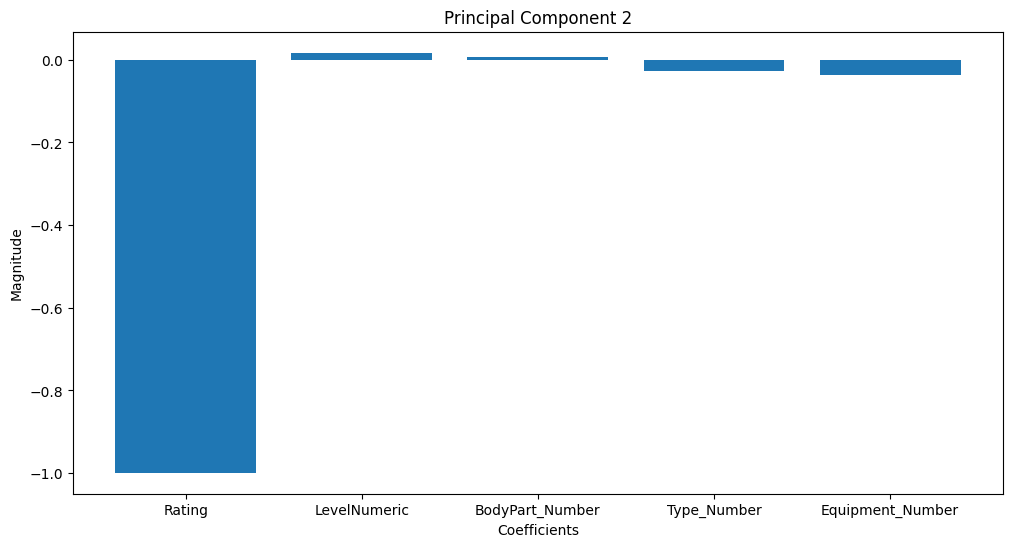

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(df_number.columns,eigenvectors[2])
plt.xlabel('Coefficients')
plt.ylabel('Magnitude')
plt.title('Principal Component 2')
plt.show()

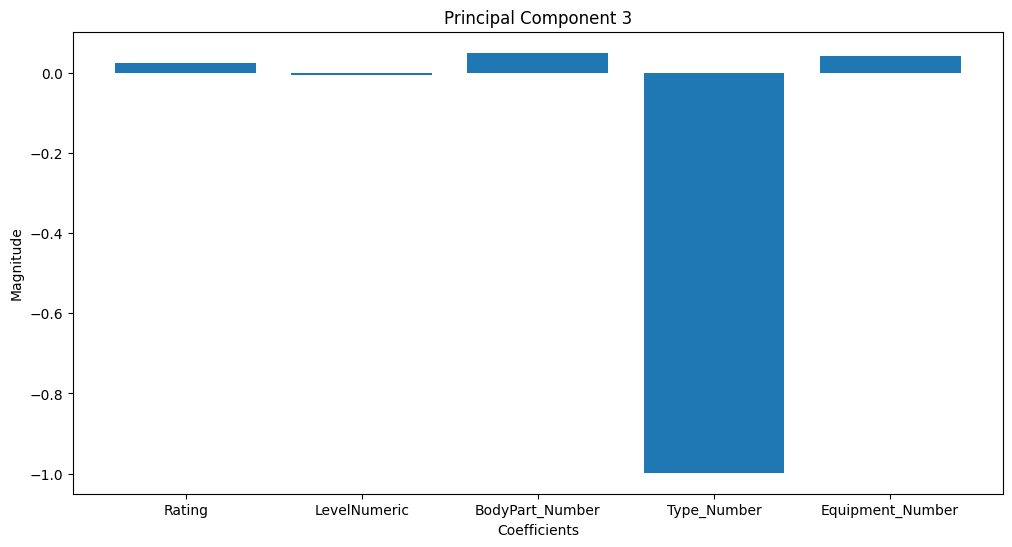

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(df_number.columns,eigenvectors[3])
plt.xlabel('Coefficients')
plt.ylabel('Magnitude')
plt.title('Principal Component 3')
plt.show()

In [ ]:
df_transformed = df_number @ eigenvectors[0:3].T
df_transformed

,0,1,2
0,-0.503493,0.795104,-8.997382
1,-0.503493,0.795104,-8.997382
2,-0.501151,0.810615,-8.597874
3,-0.298550,0.824355,-8.433146
4,-0.478904,0.957968,-4.802555
...,...,...,...
496,-15.432761,1.120752,-8.228015
497,-15.384753,1.438725,-0.038116
498,-15.574164,4.070488,-9.439018
499,-15.572408,4.082121,-9.139388


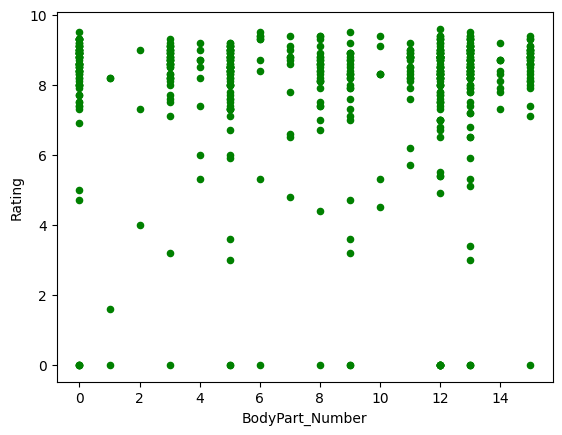

In [ ]:
df_number.plot.scatter(x='BodyPart_Number', y='Rating', color = 'green')
plt.show()

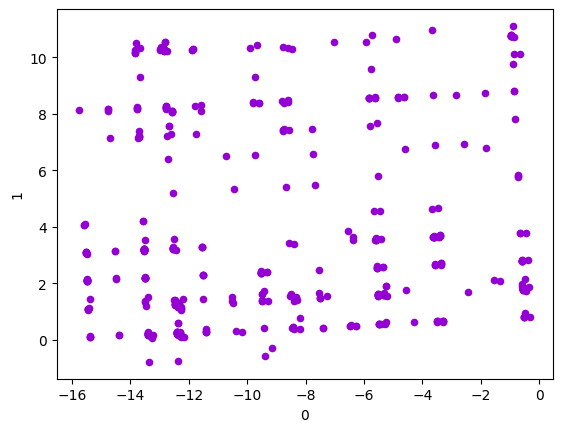

In [ ]:
df_transformed.plot.scatter(x=0, y=1, color = 'darkviolet')
plt.show()

In [ ]:
fig = px.scatter_3d(df_number, x='BodyPart_Number', y='Rating', z='LevelNumeric', color='Rating')

fig.show()

In [ ]:
fig = px.scatter_3d(df_transformed, x=0, y=1, z=2)
fig.show()

In [ ]:
from scipy.stats import ttest_ind
##T-testing for level and Rating
group1 = df[df['Level'] == 'Beginner']['Rating']
group2 = df[df['Level'] == 'Intermediate']['Rating']

t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("The difference between the groups is statistically significant.")
else:
    print("The difference between the groups is not statistically significant.")


T-Statistic: -2.3178033514113916
P-Value: 0.022544471004197226
The difference between the groups is statistically significant.


The results of the t-test show a t-statistic of -2.32 and a p-value of 0.0225. The p-value is less than the significance threshold of 0.05, which indicates that the difference in Rating between the "Beginner" and "Intermediate" levels is statistically significant. This means there is evidence to suggest that the average rating for these two groups is not the same, and the observed difference is unlikely to be due to random chance.

In [ ]:
from scipy.stats import ttest_ind
# T-test for BodyPart and Rating
bodypart1 = df[df['BodyPart'] == 'Abdominals']['Rating']
bodypart2 = df[df['BodyPart'] == 'Triceps']['Rating']

t_stat, p_value = ttest_ind(bodypart1, bodypart2, equal_var=False)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("The difference between the groups is statistically significant.")
else:
    print("The difference between the groups is not statistically significant.")

T-Statistic: -1.1042413997647107
P-Value: 0.2725368491654357
The difference between the groups is not statistically significant.
